In [2]:
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

net_df = pd.read_csv("../DATASETS/new_df_dies.csv", index_col="Dates", parse_dates=True)
net_df

,Agressions,New Years,agressions_lag_1,agressions_lag_2,agressions_lag_3,agressions_lag_4,agressions_week_avg,agressions_biweek_avg,agressions_1_month_avg,agressions_2_month_avg,...,"sin(1,freq=W-SUN)","cos(1,freq=W-SUN)","sin(2,freq=W-SUN)","cos(2,freq=W-SUN)","sin(3,freq=W-SUN)","cos(3,freq=W-SUN)",Poverty,HS Grads,BA Grads,Housing
Dates,,,,,,,,,,,,,,,,,,,,,
2001-01-01,100.0,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.196,0.71817,0.254851,0.437756
2001-01-02,5.0,0,100.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.781831,0.623490,0.974928,-0.222521,0.433884,-0.900969,0.196,0.71817,0.254851,0.437756
2001-01-03,11.0,0,5.0,100.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.974928,-0.222521,-0.433884,-0.900969,-0.781831,0.623490,0.196,0.71817,0.254851,0.437756
2001-01-04,3.0,0,11.0,5.0,100.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.433884,-0.900969,-0.781831,0.623490,0.974928,-0.222521,0.196,0.71817,0.254851,0.437756
2001-01-05,8.0,0,3.0,11.0,5.0,100.0,0.000000,0.000000,0.000000,0.000000,...,-0.433884,-0.900969,0.781831,0.623490,-0.974928,-0.222521,0.196,0.71817,0.254851,0.437756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-07,5.0,0,7.0,6.0,9.0,10.0,7.000000,6.928571,6.766667,6.800000,...,0.974928,-0.222521,-0.433884,-0.900969,-0.781831,0.623490,0.173,0.85900,0.411000,0.453000
2018-11-08,5.0,0,5.0,7.0,6.0,9.0,6.714286,6.857143,6.766667,6.800000,...,0.433884,-0.900969,-0.781831,0.623490,0.974928,-0.222521,0.173,0.85900,0.411000,0.453000
2018-11-09,4.0,0,5.0,5.0,7.0,6.0,6.571429,6.214286,6.733333,6.766667,...,-0.433884,-0.900969,0.781831,0.623490,-0.974928,-0.222521,0.173,0.85900,0.411000,0.453000


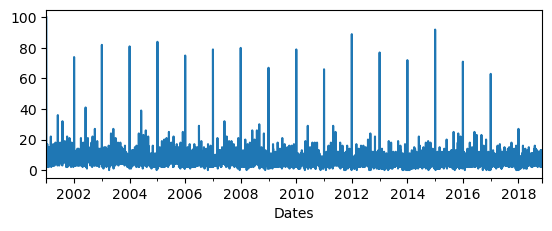

In [2]:
net_df["Agressions"].plot(subplots=True, layout=(2,1));

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


train_data, test_data = net_df[0:int(len(net_df)*0.9)], net_df[int(len(net_df)*0.9):]


train_arima = train_data['Agressions']
test_arima = test_data['Agressions']


history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5871
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -19091.469
Date:                Mon, 15 Jan 2024   AIC                          38186.937
Time:                        11:36:44   BIC                          38200.292
Sample:                             0   HQIC                         38191.580
                               - 5871                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4863      0.002   -201.631      0.000      -0.491      -0.482
sigma2        39.1285      0.128    304.990      0.000      38.877      39.380
Ljung-Box (L1) (Q):                 101.02   Jarque-

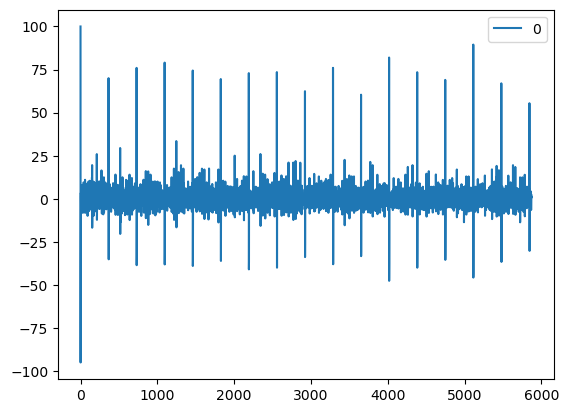

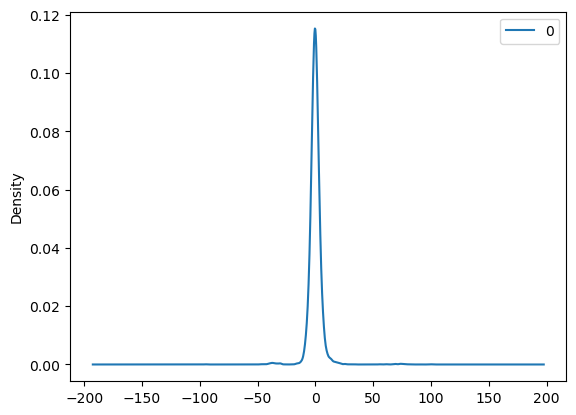

                 0
count  5871.000000
mean     -0.006929
std       6.418333
min     -94.997508
25%      -2.458867
50%      -0.054844
75%       2.027422
max     100.000000


In [4]:
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [5]:
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])

In [6]:
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

In [7]:
# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

MSE: 13.749794043904773
MAE: 2.8790690736337403
RMSE: 3.7080714723296224


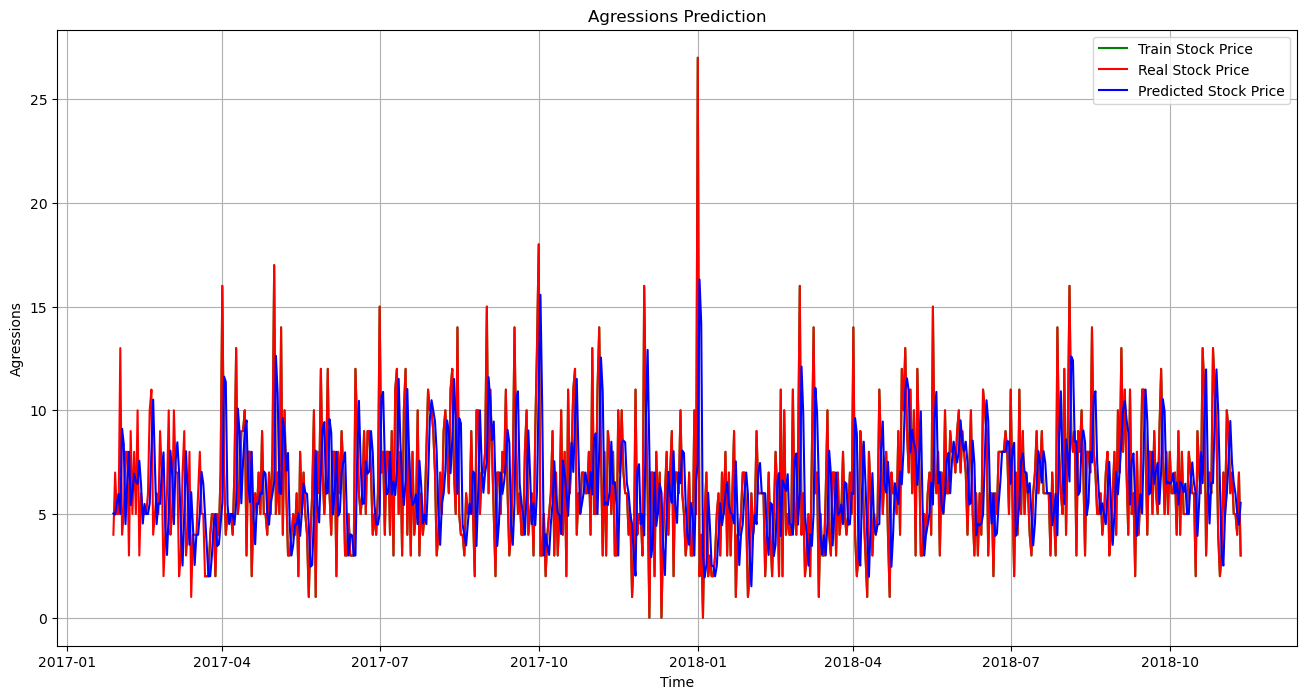

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(net_df.index[-600:], net_df['Agressions'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title('Agressions Prediction')
plt.xlabel('Time')
plt.ylabel('Agressions')
plt.legend()
plt.grid(True)
plt.savefig('arima_model.pdf')
plt.show()

In [9]:
y

Dates
2017-01-28     4.0
2017-01-29     7.0
2017-01-30     5.0
2017-01-31     5.0
2017-02-01    13.0
              ... 
2018-11-07     5.0
2018-11-08     5.0
2018-11-09     4.0
2018-11-10     7.0
2018-11-11     3.0
Name: Agressions, Length: 653, dtype: float64

In [10]:
y = pd.concat([y, pd.Series(predictions, index=y.index[-len(predictions):], name='Predictions')], axis=1)

# Imprimir el resultado
print(y)

            Agressions  Predictions
Dates                              
2017-01-28         4.0     5.027422
2017-01-29         7.0     4.972592
2017-01-30         5.0     5.541070
2017-01-31         5.0     5.972631
2017-02-01        13.0     5.000000
...                ...          ...
2018-11-07         5.0     6.513677
2018-11-08         5.0     5.972656
2018-11-09         4.0     5.000000
2018-11-10         7.0     4.486322
2018-11-11         3.0     5.541010

[653 rows x 2 columns]


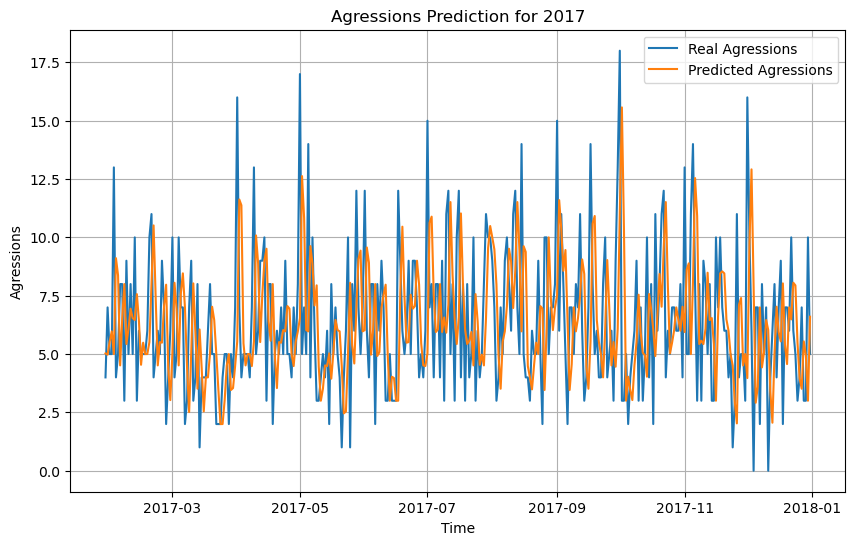

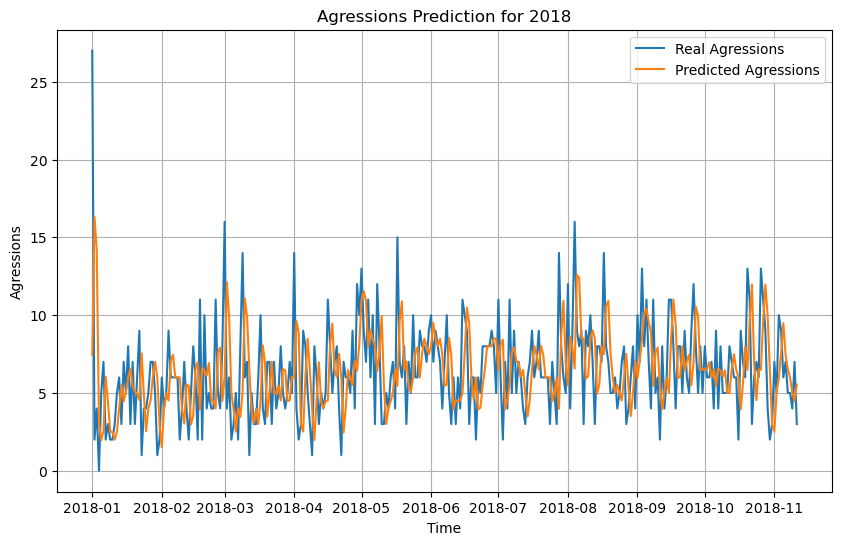

In [11]:
# Convertir el índice a datetime si no está en ese formato
y.index = pd.to_datetime(y.index)

# Filtrar datos por año
y_2017 = y[y.index.year == 2017]
y_2018 = y[y.index.year == 2018]

# Plot para 2017
plt.figure(figsize=(10, 6))
plt.plot(y_2017.index, y_2017['Agressions'], label='Real Agressions')
plt.plot(y_2017.index, y_2017['Predictions'], label='Predicted Agressions')
plt.title('Agressions Prediction for 2017')
plt.xlabel('Time')
plt.ylabel('Agressions')
plt.legend()
plt.grid(True)
plt.savefig('predictions_2017.pdf')
plt.show()

# Plot para 2018
plt.figure(figsize=(10, 6))
plt.plot(y_2018.index, y_2018['Agressions'], label='Real Agressions')
plt.plot(y_2018.index, y_2018['Predictions'], label='Predicted Agressions')
plt.title('Agressions Prediction for 2018')
plt.xlabel('Time')
plt.ylabel('Agressions')
plt.legend()
plt.grid(True)
plt.savefig('predictions_2018.pdf')
plt.show()
